In [6]:
# Dataframe
import pandas as pd

import spacy

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import contractions
# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)

from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
pip install contractions

  Using cached contractions-0.1.68-py2.py3-none-any.whl (8.1 kB)
  Using cached textsearch-0.0.21-py2.py3-none-any.whl (7.5 kB)
  Using cached anyascii-0.3.1-py3-none-any.whl (287 kB)
  Using cached pyahocorasick-1.4.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (106 kB)


In [ ]:
product_reviews_hp5 = pd.read_csv('clean_review_laptops.csv')

In [ ]:
product_reviews_hp5.head()

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,rank,also_view,main_cat,similar_item,date,price,review_text,time,rating_class,clean_text
0,5,True,A36O9HQS83TUX6,1254875778,Rafael Antonio herrera,1412985600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Five Stars excellent salesman problem solved,2014-10-11,good,five star excellent salesman problem solve
1,5,True,A358J4WU5B0Y9Q,1254875778,G4M,1409184000,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"Great RAM, Got them to be used with SuperMicro...",2014-08-28,good,great ram get use supermicro receive time grea...
2,5,True,A1QSBRR1IFFSD0,1254875778,Tech nerd,1388102400,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Works perfectly. No issues here. Used this RAM...,2013-12-27,good,work perfectly no issue use ram double current...
3,5,True,A2UGZCGCYPBMNA,1254875778,Larry Butler,1373500800,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Good memory at a great price 2GB really peps u...,2013-07-11,good,good memory great price gb really peps win net...
4,1,True,A3H150XFJ7S4KE,1254875778,93TransAmLT1,1367193600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"This comany is a joke, DON'T buy from them unl...",2013-04-29,bad,comany joke not buy unless like problems amama...


In [ ]:
import pandas_profiling
from tqdm.notebook import tqdm
pandas_profiling.ProfileReport(product_reviews_hp5)

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
product_reviews_hp5['time'] = pd.to_datetime(product_reviews_hp5['time'])
product_reviews_hp5['year'] = product_reviews_hp5['time'].dt.year
product_reviews_hp5 = product_reviews_hp5.drop('time', axis = 1)
product_reviews_hp5.head(3)

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,rank,also_view,main_cat,similar_item,date,price,review_text,rating_class,clean_text,year
0,5,True,A36O9HQS83TUX6,1254875778,Rafael Antonio herrera,1412985600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Five Stars excellent salesman problem solved,good,five star excellent salesman problem solve,2014
1,5,True,A358J4WU5B0Y9Q,1254875778,G4M,1409184000,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"Great RAM, Got them to be used with SuperMicro...",good,great ram get use supermicro receive time grea...,2014
2,5,True,A1QSBRR1IFFSD0,1254875778,Tech nerd,1388102400,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"['>#3,132 in Computers &amp; Accessories &gt; ...","['B004K4MZ1E', 'B004K4IULS', 'B005LDLP8W', 'B0...",Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Works perfectly. No issues here. Used this RAM...,good,work perfectly no issue use ram double current...,2013


In [ ]:
# How many unique customers do we have in the dataset?
print('Number of unique customers: {}'.format(len(product_reviews_hp5['reviewerID'].unique())))

Number of unique customers: 14396


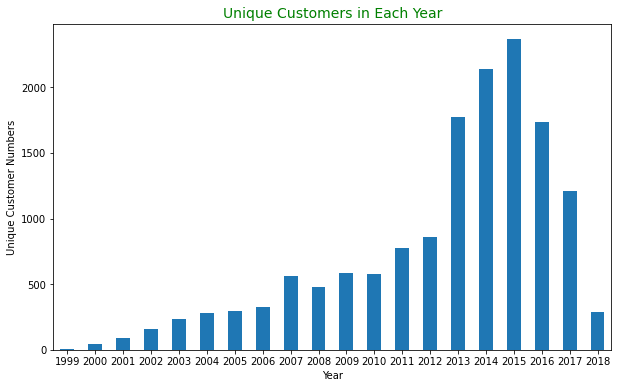

year
1999       6
2000      43
2001      91
2002     155
2003     231
2004     284
2005     294
2006     326
2007     560
2008     477
2009     584
2010     578
2011     775
2012     861
2013    1774
2014    2141
2015    2366
2016    1735
2017    1211
2018     289
Name: reviewerID, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# How many unique customers in each year?
unique_cust = product_reviews_hp5.groupby('year')['reviewerID'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0)
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

In [ ]:
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
product_reviews_hp5['token'] = product_reviews_hp5['clean_text'].astype(str).apply(token)

In [ ]:
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
product_reviews_hp5['review_length'] = product_reviews_hp5['review_text'].apply(length)
product_reviews_hp5.head(3)

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,main_cat,similar_item,date,price,review_text,rating_class,clean_text,year,token,review_length
0,5,True,A36O9HQS83TUX6,1254875778,Rafael Antonio herrera,1412985600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Five Stars excellent salesman problem solved,good,five star excellent salesman problem solve,2014,"[five, star, excellent, salesman, problem, solve]",6
1,5,True,A358J4WU5B0Y9Q,1254875778,G4M,1409184000,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"Great RAM, Got them to be used with SuperMicro...",good,great ram get use supermicro receive time grea...,2014,"[great, ram, get, use, supermicro, receive, ti...",33
2,5,True,A1QSBRR1IFFSD0,1254875778,Tech nerd,1388102400,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,Computers,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Works perfectly. No issues here. Used this RAM...,good,work perfectly no issue use ram double current...,2013,"[work, perfectly, no, issue, use, ram, double,...",26


In [ ]:
product_reviews_hp5['review_length_bin'] = pd.cut(product_reviews_hp5['review_length'], np.arange(0,4800,100))
product_reviews_hp5.head()

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,similar_item,date,price,review_text,rating_class,clean_text,year,token,review_length,review_length_bin
0,5,True,A36O9HQS83TUX6,1254875778,Rafael Antonio herrera,1412985600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Five Stars excellent salesman problem solved,good,five star excellent salesman problem solve,2014,"[five, star, excellent, salesman, problem, solve]",6,"(0, 100]"
1,5,True,A358J4WU5B0Y9Q,1254875778,G4M,1409184000,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"Great RAM, Got them to be used with SuperMicro...",good,great ram get use supermicro receive time grea...,2014,"[great, ram, get, use, supermicro, receive, ti...",33,"(0, 100]"
2,5,True,A1QSBRR1IFFSD0,1254875778,Tech nerd,1388102400,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Works perfectly. No issues here. Used this RAM...,good,work perfectly no issue use ram double current...,2013,"[work, perfectly, no, issue, use, ram, double,...",26,"(0, 100]"
3,5,True,A2UGZCGCYPBMNA,1254875778,Larry Butler,1373500800,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Good memory at a great price 2GB really peps u...,good,good memory great price gb really peps win net...,2013,"[good, memory, great, price, gb, really, peps,...",50,"(0, 100]"
4,1,True,A3H150XFJ7S4KE,1254875778,93TransAmLT1,1367193600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"This comany is a joke, DON'T buy from them unl...",bad,comany joke not buy unless like problems amama...,2013,"[comany, joke, not, buy, unless, like, problem...",197,"(100, 200]"


In [ ]:
df = product_reviews_hp5.drop(product_reviews_hp5[(product_reviews_hp5['review_length'] > 150) & (product_reviews_hp5['rating_class'] == 'good')].index)

In [ ]:
df = df.drop(df[(df['year'] < 2010)].index)
df=df.head(15000)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10961 entries, 0 to 15218
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rating             10961 non-null  int64   
 1   verified           10961 non-null  bool    
 2   reviewerID         10961 non-null  object  
 3   asin               10961 non-null  object  
 4   reviewerName       10959 non-null  object  
 5   unixReviewTime     10961 non-null  int64   
 6   category           10961 non-null  object  
 7   description        10961 non-null  object  
 8   title              10961 non-null  object  
 9   also_buy           10961 non-null  object  
 10  brand              10949 non-null  object  
 11  feature            10961 non-null  object  
 12  rank               10961 non-null  object  
 13  also_view          10961 non-null  object  
 14  main_cat           10961 non-null  object  
 15  similar_item       8180 non-null   object  
 16  date

In [ ]:
df.to_csv('sentimentanalysis_laptop.csv', sep=',', encoding='utf-8', index = False)

In [ ]:
df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})
    
feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

df = df[["clean_text", "rating_class_num"]].reset_index()
df.head(10)

In [ ]:
df = df[["clean_text", "rating_class_num"]].reset_index()
df.head(10)

In [ ]:
countVec = CountVectorizer(ngram_range=(1, 2),binary=True)


In [ ]:
df=df.dropna(subset=['clean_text'])

In [ ]:
countVec.fit(df["clean_text"])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
transformed_matrix = countVec.transform(df["clean_text"])

In [ ]:
transformed_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
names = countVec.get_feature_names()

In [ ]:
# Adding a 'rating' column from previous dataframe's rating value
df = pd.DataFrame(transformed_matrix.toarray(), columns=names)
df['rating'] = df['rating_class_num']

MemoryError: Unable to allocate 11.4 GiB for an array with shape (10959, 139070) and data type int64